In [ ]:
!pip install pymatgen
!pip install pubchempy
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13819 sha256=c5eb0c9583587ef8a27d73bc0a04d988530cfbae5c4cd0692a6d9a924cef0067
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. Парсинг дескрипторов

In [6]:
import requests
import pandas as pd
import pubchempy as pcp
import numpy as np

from rdkit.Chem import Descriptors, PandasTools, MolFromSmiles
from rdkit import Chem
df = pd.read_csv('data.csv')
df

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
0,gdb_3116,N#CC12CC1CO2,5.99438,2.27301,1.94738,4.5933,55.81,-0.2627,-0.0086,0.2541,...,0.090625,-323.338627,-323.332830,-323.331885,-323.368166,21.459,-1226.756250,-1233.784350,-1240.302914,-1147.410874
1,gdb_117880,COCC(O)C#CC=O,2.32923,0.75737,0.59946,3.4068,77.34,-0.2697,-0.0657,0.2040,...,0.131823,-458.914682,-458.903948,-458.903004,-458.952489,35.183,-1655.449691,-1663.823171,-1673.306087,-1542.777940
2,gdb_23434,COC1C2CC(=NO)C12,2.71950,1.23126,1.02616,1.2920,76.75,-0.2258,0.0156,0.2414,...,0.146098,-438.996978,-438.988148,-438.987204,-439.030829,32.710,-1694.820233,-1705.277043,-1715.352955,-1572.928492
3,gdb_61956,CC(CC=O)OCC#C,2.29944,0.85305,0.65285,3.1488,79.50,-0.2438,-0.0199,0.2239,...,0.154138,-422.988608,-422.977883,-422.976938,-423.026195,36.895,-1838.172154,-1848.329015,-1858.997295,-1712.247413
4,gdb_98812,COC(=N)N1CCC1=N,3.03493,1.26316,0.90731,1.9135,77.81,-0.2343,0.0056,0.2400,...,0.147974,-435.272093,-435.262958,-435.262014,-435.306724,32.448,-1706.582262,-1716.847054,-1726.922966,-1584.819788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,gdb_48435,C1CC1(CCC#N)C=O,2.81953,0.95253,0.78315,5.6157,77.77,-0.2667,-0.0340,0.2328,...,0.146377,-401.969669,-401.960439,-401.959495,-402.004365,33.153,-1814.359442,-1824.565876,-1834.641788,-1693.253970
4996,gdb_111594,CCN1C2CC3OC2C13,4.22393,1.23139,1.15079,1.2093,78.14,-0.2139,0.0760,0.2898,...,0.172360,-403.082393,-403.074974,-403.074030,-403.114261,30.043,-1884.752147,-1897.872105,-1909.134009,-1748.501118
4997,gdb_80576,CN1C2CC(O)CC12C,2.40023,1.44261,1.26824,2.0425,81.95,-0.2130,0.0709,0.2839,...,0.194093,-404.332161,-404.322884,-404.321940,-404.365564,36.045,-2041.141195,-2054.872347,-2067.320243,-1892.482430
4998,gdb_5182,c1cnc([nH]1)OC=O,8.05652,1.25277,1.08801,4.1565,58.08,-0.2300,-0.0153,0.2147,...,0.084993,-414.713710,-414.706937,-414.705993,-414.745694,23.621,-1272.996133,-1279.411157,-1285.929721,-1192.179249


In [7]:
computed_descriptors = Descriptors.descList
for descriptor in computed_descriptors:
  list=[]    # перебор всех дескрипторов
  for i in df['smiles']:
      value = descriptor[1](Chem.MolFromSmiles(i))
      list.append(value) # вычисление дескриптора по смайлс
  df[descriptor[0]] = list
df

<ipython-input-7-f2480c88c178>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[descriptor[0]] = list
<ipython-input-7-f2480c88c178>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[descriptor[0]] = list
<ipython-input-7-f2480c88c178>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[descript

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,gdb_3116,N#CC12CC1CO2,5.99438,2.27301,1.94738,4.5933,55.81,-0.2627,-0.0086,0.2541,...,0,0,0,0,0,0,0,0,0,0
1,gdb_117880,COCC(O)C#CC=O,2.32923,0.75737,0.59946,3.4068,77.34,-0.2697,-0.0657,0.2040,...,0,0,0,0,0,0,0,0,0,0
2,gdb_23434,COC1C2CC(=NO)C12,2.71950,1.23126,1.02616,1.2920,76.75,-0.2258,0.0156,0.2414,...,0,0,0,0,0,0,0,0,0,0
3,gdb_61956,CC(CC=O)OCC#C,2.29944,0.85305,0.65285,3.1488,79.50,-0.2438,-0.0199,0.2239,...,0,0,0,1,0,0,0,0,0,0
4,gdb_98812,COC(=N)N1CCC1=N,3.03493,1.26316,0.90731,1.9135,77.81,-0.2343,0.0056,0.2400,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,gdb_48435,C1CC1(CCC#N)C=O,2.81953,0.95253,0.78315,5.6157,77.77,-0.2667,-0.0340,0.2328,...,0,0,0,0,0,0,0,0,0,0
4996,gdb_111594,CCN1C2CC3OC2C13,4.22393,1.23139,1.15079,1.2093,78.14,-0.2139,0.0760,0.2898,...,0,0,0,0,0,0,0,0,0,0
4997,gdb_80576,CN1C2CC(O)CC12C,2.40023,1.44261,1.26824,2.0425,81.95,-0.2130,0.0709,0.2839,...,0,0,0,0,0,0,0,0,0,0
4998,gdb_5182,c1cnc([nH]1)OC=O,8.05652,1.25277,1.08801,4.1565,58.08,-0.2300,-0.0153,0.2147,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.to_csv('data1.csv', index=False)

2. Предобработка данных

1) Выполните каждый шаг по очистке данных (валидация, обработка недостающих значений, обнаружение выбросов, обработка дубликатов, преобразование и нормализация данных).

2) Сократите размерность данных любым методом отбора параметров.

In [9]:
df1 = pd.read_csv('data1.csv')
df1

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,gdb_3116,N#CC12CC1CO2,5.99438,2.27301,1.94738,4.5933,55.81,-0.2627,-0.0086,0.2541,...,0,0,0,0,0,0,0,0,0,0
1,gdb_117880,COCC(O)C#CC=O,2.32923,0.75737,0.59946,3.4068,77.34,-0.2697,-0.0657,0.2040,...,0,0,0,0,0,0,0,0,0,0
2,gdb_23434,COC1C2CC(=NO)C12,2.71950,1.23126,1.02616,1.2920,76.75,-0.2258,0.0156,0.2414,...,0,0,0,0,0,0,0,0,0,0
3,gdb_61956,CC(CC=O)OCC#C,2.29944,0.85305,0.65285,3.1488,79.50,-0.2438,-0.0199,0.2239,...,0,0,0,1,0,0,0,0,0,0
4,gdb_98812,COC(=N)N1CCC1=N,3.03493,1.26316,0.90731,1.9135,77.81,-0.2343,0.0056,0.2400,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,gdb_48435,C1CC1(CCC#N)C=O,2.81953,0.95253,0.78315,5.6157,77.77,-0.2667,-0.0340,0.2328,...,0,0,0,0,0,0,0,0,0,0
4996,gdb_111594,CCN1C2CC3OC2C13,4.22393,1.23139,1.15079,1.2093,78.14,-0.2139,0.0760,0.2898,...,0,0,0,0,0,0,0,0,0,0
4997,gdb_80576,CN1C2CC(O)CC12C,2.40023,1.44261,1.26824,2.0425,81.95,-0.2130,0.0709,0.2839,...,0,0,0,0,0,0,0,0,0,0
4998,gdb_5182,c1cnc([nH]1)OC=O,8.05652,1.25277,1.08801,4.1565,58.08,-0.2300,-0.0153,0.2147,...,0,0,0,0,0,0,0,0,0,0


In [10]:
missing_values = df1.isnull().sum().sort_values(ascending=False)
print("Missing values in the data:")
print(missing_values)

Missing values in the data:
mol_id       0
fr_C_O       0
MolLogP      0
MolMR        0
fr_Al_COO    0
            ..
SMR_VSA10    0
SMR_VSA2     0
SMR_VSA3     0
SMR_VSA4     0
fr_urea      0
Length: 238, dtype: int64


In [11]:
# Удаление столбцов с типом данных 'object' (строковые данные)
df3 = df1.drop(df.select_dtypes(include=['object']).columns, axis=1)

# Вывод измененного датафрейма
print("\nДатафрейм после удаления строковых столбцов:")
df3.to_csv('data3.csv', index=False)
df3


Датафрейм после удаления строковых столбцов:


,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,5.99438,2.27301,1.94738,4.5933,55.81,-0.2627,-0.0086,0.2541,650.3290,0.090625,...,0,0,0,0,0,0,0,0,0,0
1,2.32923,0.75737,0.59946,3.4068,77.34,-0.2697,-0.0657,0.2040,1808.5114,0.131823,...,0,0,0,0,0,0,0,0,0,0
2,2.71950,1.23126,1.02616,1.2920,76.75,-0.2258,0.0156,0.2414,1215.4323,0.146098,...,0,0,0,0,0,0,0,0,0,0
3,2.29944,0.85305,0.65285,3.1488,79.50,-0.2438,-0.0199,0.2239,1685.1071,0.154138,...,0,0,0,1,0,0,0,0,0,0
4,3.03493,1.26316,0.90731,1.9135,77.81,-0.2343,0.0056,0.2400,1271.6972,0.147974,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.81953,0.95253,0.78315,5.6157,77.77,-0.2667,-0.0340,0.2328,1442.5369,0.146377,...,0,0,0,0,0,0,0,0,0,0
4996,4.22393,1.23139,1.15079,1.2093,78.14,-0.2139,0.0760,0.2898,1141.0494,0.172360,...,0,0,0,0,0,0,0,0,0,0
4997,2.40023,1.44261,1.26824,2.0425,81.95,-0.2130,0.0709,0.2839,1145.1258,0.194093,...,0,0,0,0,0,0,0,0,0,0
4998,8.05652,1.25277,1.08801,4.1565,58.08,-0.2300,-0.0153,0.2147,988.9973,0.084993,...,0,0,0,0,0,0,0,0,0,0


Дисперсия

In [12]:
import pandas as pd

# Вычисление дисперсии для каждого столбца
variance = df3.var()

# Вывод результата
print(variance)

A                    1.807007
B                    0.207368
C                    0.112721
mu                   2.299563
alpha               63.592403
                      ...    
fr_thiazole          0.000000
fr_thiocyan          0.000000
fr_thiophene         0.000000
fr_unbrch_alkane     0.013511
fr_urea              0.008528
Length: 236, dtype: float64


In [13]:
# # Вычисляем дисперсию для каждого столбца
variance = df3.var()
columns = df3.columns

# Определяем столбцы, если их дисперсия превышает порог
to_drop = [column for column in variance.index if variance[column] < 0.05]

df4=df3.drop(to_drop, axis=1)
print("Итоговый датафрейм после фильтрации:")
df4.to_csv('data4.csv', index=False)
df4

Итоговый датафрейм после фильтрации:


,A,B,C,mu,alpha,r2,u0,u298,h298,g298,...,fr_aryl_methyl,fr_bicyclic,fr_epoxide,fr_ether,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_nitrile,fr_piperdine,fr_term_acetylene
0,5.99438,2.27301,1.94738,4.5933,55.81,650.3290,-323.338627,-323.332830,-323.331885,-323.368166,...,0,1,0,1,0,0,0,1,0,0
1,2.32923,0.75737,0.59946,3.4068,77.34,1808.5114,-458.914682,-458.903948,-458.903004,-458.952489,...,0,0,0,1,0,0,1,0,0,0
2,2.71950,1.23126,1.02616,1.2920,76.75,1215.4323,-438.996978,-438.988148,-438.987204,-439.030829,...,0,1,0,1,0,0,1,0,0,0
3,2.29944,0.85305,0.65285,3.1488,79.50,1685.1071,-422.988608,-422.977883,-422.976938,-423.026195,...,0,0,0,1,0,0,0,0,0,1
4,3.03493,1.26316,0.90731,1.9135,77.81,1271.6972,-435.272093,-435.262958,-435.262014,-435.306724,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.81953,0.95253,0.78315,5.6157,77.77,1442.5369,-401.969669,-401.960439,-401.959495,-402.004365,...,0,0,0,0,0,0,0,1,0,0
4996,4.22393,1.23139,1.15079,1.2093,78.14,1141.0494,-403.082393,-403.074974,-403.074030,-403.114261,...,0,0,0,1,0,0,0,0,0,0
4997,2.40023,1.44261,1.26824,2.0425,81.95,1145.1258,-404.332161,-404.322884,-404.321940,-404.365564,...,0,1,0,0,0,0,0,0,1,0
4998,8.05652,1.25277,1.08801,4.1565,58.08,988.9973,-414.713710,-414.706937,-414.705993,-414.745694,...,0,0,0,1,0,0,0,0,0,0


In [14]:
df4.var()

,0
A,1.807007
B,0.207368
C,0.112721
mu,2.299563
alpha,63.592403
...,...
fr_ketone_Topliss,0.103279
fr_methoxy,0.072773
fr_nitrile,0.130790
fr_piperdine,0.188917


In [15]:
df4.duplicated().sum()

0

In [16]:
df4.describe()

,A,B,C,mu,alpha,r2,u0,u298,h298,g298,...,fr_aryl_methyl,fr_bicyclic,fr_epoxide,fr_ether,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_nitrile,fr_piperdine,fr_term_acetylene
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,3.380680,1.399599,1.122029,2.698183,75.385256,1189.682463,-411.123023,-411.114542,-411.113597,-411.156438,...,0.063600,0.508000,0.075200,0.512800,0.112600,0.104600,0.072400,0.132800,0.100600,0.11160
std,1.344249,0.455376,0.335740,1.516431,7.974485,279.227783,39.947351,39.947104,39.947104,39.947903,...,0.272708,0.903161,0.274882,0.643987,0.332781,0.321371,0.269764,0.361649,0.434646,0.33101
min,0.000000,0.357840,0.344070,0.000000,32.660000,260.189600,-585.454046,-585.444848,-585.443903,-585.489000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.539955,1.086510,0.909450,1.587550,70.830000,1018.295900,-437.903715,-437.895681,-437.894738,-437.937273,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,3.073670,1.367655,1.079305,2.481600,75.710000,1150.018350,-417.916019,-417.908244,-417.907300,-417.948835,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,3.811628,1.659905,1.285718,3.637700,80.662500,1312.057425,-387.042298,-387.033533,-387.032589,-387.075182,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,23.892090,6.095420,4.767860,18.280500,100.750000,2975.378300,-169.557758,-169.553764,-169.552820,-169.581024,...,3.000000,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,5.000000,2.00000


In [17]:
# Вычисление корреляции
correlation_matrix = df4.corr()
print("Корреляционная матрица:")
correlation_matrix

Корреляционная матрица:


,A,B,C,mu,alpha,r2,u0,u298,h298,g298,...,fr_aryl_methyl,fr_bicyclic,fr_epoxide,fr_ether,fr_ketone,fr_ketone_Topliss,fr_methoxy,fr_nitrile,fr_piperdine,fr_term_acetylene
A,1.000000,-0.191508,-0.063199,0.037642,-0.246926,0.152112,0.250710,0.250705,0.250705,0.250709,...,0.010063,-0.093097,0.006172,-0.025659,-0.055057,-0.053729,0.000147,-0.012005,-0.024244,0.012586
B,-0.191508,1.000000,0.903886,-0.089370,-0.456350,-0.852780,0.309636,0.309616,0.309616,0.309670,...,0.023320,0.266439,-0.017926,0.007649,0.008443,-0.000832,-0.145241,-0.093725,0.185207,-0.103325
C,-0.063199,0.903886,1.000000,-0.155691,-0.431111,-0.848306,0.406688,0.406667,0.406667,0.406722,...,-0.084920,0.342371,0.007996,0.058612,-0.008158,-0.010228,-0.156131,-0.089531,0.247197,-0.102962
mu,0.037642,-0.089370,-0.155691,1.000000,-0.249132,0.030935,-0.276164,-0.276166,-0.276166,-0.276163,...,0.025223,-0.113934,-0.061043,-0.147449,0.101879,0.081498,-0.058135,0.350209,-0.024576,-0.085746
alpha,-0.246926,-0.456350,-0.431111,-0.249132,1.000000,0.537777,0.254065,0.254084,0.254084,0.254041,...,0.024219,-0.008570,-0.073132,-0.147942,-0.096568,-0.100612,0.047888,-0.065324,-0.027228,0.128230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fr_ketone_Topliss,-0.053729,-0.000832,-0.010228,0.081498,-0.100612,-0.001119,-0.104828,-0.104828,-0.104828,-0.104830,...,-0.071357,-0.003917,0.006047,-0.074614,0.961628,1.000000,-0.036608,-0.057580,0.024899,-0.004451
fr_methoxy,0.000147,-0.145241,-0.156131,-0.058135,0.047888,0.194485,-0.113401,-0.113394,-0.113394,-0.113411,...,-0.021816,-0.087767,-0.054553,0.320533,-0.035121,-0.036608,1.000000,-0.026806,-0.051894,-0.005375
fr_nitrile,-0.012005,-0.093725,-0.089531,0.350209,-0.065324,0.050276,0.073576,0.073578,0.073578,0.073570,...,-0.061316,-0.103694,-0.036085,-0.106076,-0.064436,-0.057580,-0.026806,1.000000,-0.026468,-0.010197
fr_piperdine,-0.024244,0.185207,0.247197,-0.024576,-0.027228,-0.191842,0.102282,0.102274,0.102274,0.102293,...,-0.053989,0.239747,-0.044914,-0.124308,0.018480,0.024899,-0.051894,-0.026468,1.000000,-0.041899


In [18]:
from sklearn.preprocessing import StandardScaler
cols = df4.columns

sc = StandardScaler()
X_std = sc.fit_transform(df4[cols].values)
X_std

array([[ 1.94455109,  1.91818951,  2.45854935, ...,  2.39814205,
        -0.2314757 , -0.33718407],
       [-0.78226161, -1.41046755, -1.5566255 , ..., -0.36724316,
        -0.2314757 , -0.33718407],
       [-0.491907  , -0.36970768, -0.28557447, ..., -0.36724316,
        -0.2314757 , -0.33718407],
       ...,
       [-0.72943875,  0.09446038,  0.43553177, ..., -0.36724316,
         2.0694756 , -0.33718407],
       [ 3.47875011, -0.32246729, -0.10133611, ..., -0.36724316,
        -0.2314757 , -0.33718407],
       [-0.44139049, -0.08321265, -0.44955703, ..., -0.36724316,
        -0.2314757 , -0.33718407]])

Найти пары признаков с корреляцией выше 0.7.
Исключить один признак из каждой сильно коррелирующей пары. Или сгруппировать их в 1 если это возможно

In [19]:
#фильтрация по ковариации для оценки корреляции
FILTER_THRESHOLD = 0.7
cov_mat =np.cov(X_std.T)
cov_mat_df4 = pd.DataFrame(cov_mat, columns=cols)

upper_tri = cov_mat_df4.where(
    np.triu(
        np.ones(cov_mat_df4.shape), k=1).astype(np.bool_)
        )

to_drop_cor = [column for column in upper_tri.columns if any(abs(upper_tri[column]) > FILTER_THRESHOLD)]

df5 = df4.drop(to_drop_cor, axis=1)
df5

,A,B,mu,alpha,u0,cv,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,SPS,...,fr_Ar_NH,fr_NH1,fr_aldehyde,fr_allylic_oxid,fr_aryl_methyl,fr_bicyclic,fr_epoxide,fr_ketone,fr_methoxy,fr_piperdine
0,5.99438,2.27301,4.5933,55.81,-323.338627,21.459,8.311944,0.263889,-0.263889,53.857143,...,0,0,0,0,0,1,0,0,0,0
1,2.32923,0.75737,3.4068,77.34,-458.914682,35.183,9.588026,0.139722,-0.847037,11.333333,...,0,0,1,0,0,0,0,0,1,0
2,2.71950,1.23126,1.2920,76.75,-438.996978,32.710,8.328809,0.371204,0.371204,50.333333,...,0,0,0,0,0,1,0,0,1,0
3,2.29944,0.85305,3.1488,79.50,-422.988608,36.895,9.846767,0.043009,-0.043009,12.000000,...,0,0,1,0,0,0,0,0,0,0
4,3.03493,1.26316,1.9135,77.81,-435.272093,32.448,7.125972,0.075231,0.075231,17.000000,...,0,2,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.81953,0.95253,5.6157,77.77,-401.969669,33.153,10.285547,0.059792,-0.059792,20.333333,...,0,0,1,0,0,0,0,0,0,0
4996,4.22393,1.23139,1.2093,78.14,-403.082393,30.043,5.502454,0.638843,0.638843,61.000000,...,0,0,0,0,0,0,0,0,0,0
4997,2.40023,1.44261,2.0425,81.95,-404.332161,36.045,9.186319,0.017407,-0.017407,63.666667,...,0,0,0,0,0,1,0,0,0,1
4998,8.05652,1.25277,4.1565,58.08,-414.713710,23.621,9.590000,0.222222,0.222222,8.500000,...,1,1,0,0,0,0,0,0,0,0


In [20]:
df5.to_csv('data5.csv', index=False)

3. Проведение статистических тестов

In [21]:
from scipy.stats import shapiro, normaltest
# Тест Шапиро-Уилка
stat, p = shapiro(df5)
print(p > 0.05) # H0: распределение нормальное

False


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 370000.
  res = hypotest_fun_out(*samples, **kwds)


Распределение параметров ненормальное, проведем рассчёт теста на нормальность по каждому столбцу. Для проверки нулевй гипотезы о нормальности распределения по р-value > 0.05.

In [22]:
from scipy import stats as ss

# Обход всех столбцов в DataFrame
for column in df5.columns:
    # Проведение теста Шапиро-Уилка только если столбец содержит числовые данные
    if df4[column].dtype in ['float64', 'int64']:
        statistic, p_value = ss.shapiro(df4[column].loc[0:500])  # Берем меньшую выборку для корректной работы теста

        # Вывод результатов
        print(f"Столбец: {column}")
        print(f"Статистика теста: {statistic}")
        print(f"P-значение: {p_value}")

        # Интерпретация результатов
        alpha = 0.05  # Уровень значимости
        if p_value > alpha:
            print("Данные похожи на нормальное распределение (гипотеза о нормальности не отвергается).")
        else:
            print("Данные не похожи на нормальное распределение (гипотеза о нормальности отвергается).")
        print()

Столбец: A
Статистика теста: 0.8356004958495507
P-значение: 2.4248116761319923e-22
Данные не похожи на нормальное распределение (гипотеза о нормальности отвергается).

Столбец: B
Статистика теста: 0.969567093604542
P-значение: 1.0950062845122329e-08
Данные не похожи на нормальное распределение (гипотеза о нормальности отвергается).

Столбец: mu
Статистика теста: 0.966904049621985
P-значение: 3.3565848241333326e-09
Данные не похожи на нормальное распределение (гипотеза о нормальности отвергается).

Столбец: alpha
Статистика теста: 0.9930415555143878
P-значение: 0.020234695328087506
Данные не похожи на нормальное распределение (гипотеза о нормальности отвергается).

Столбец: u0
Статистика теста: 0.9794189936022142
P-значение: 1.6127067097613246e-06
Данные не похожи на нормальное распределение (гипотеза о нормальности отвергается).

Столбец: cv
Статистика теста: 0.9959621369468556
P-значение: 0.22948624667650547
Данные похожи на нормальное распределение (гипотеза о нормальности не отверга

In [23]:
# t-test
x = df4[df4['fr_nitrile'] == 0]
y = df4[df4['fr_nitrile'] > 0]
x['mu']
t_stat, p_value = ss.ttest_ind(x['mu'], y['mu'])

print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value > 0.05:
    print('Мы не можем утверждать о статистически значимой разнице между группами при уровне значимости 0.05')
else:
    print('Мы можем утверждать о статистически значимой разнице между группами при уровне значимости 0.05')

T-statistic: -26.996226773672888, P-value: 5.888337144907363e-150
Мы можем утверждать о статистически значимой разнице между группами при уровне значимости 0.05


4. Визуализация данных

Создайте не менее 4 различных типов статистических графиков. Используйте seaborn и plotly для их визуализации. Сделайте выводы и объясните, почему эти графики полезны для анализа ваших данных.

In [24]:
!pip install pandas seaborn plotly

In [25]:
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

In [26]:
#Для построения графиков используем цветовую палитру
colors = sns.color_palette('pastel', 5)

In [27]:
colors

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0)]

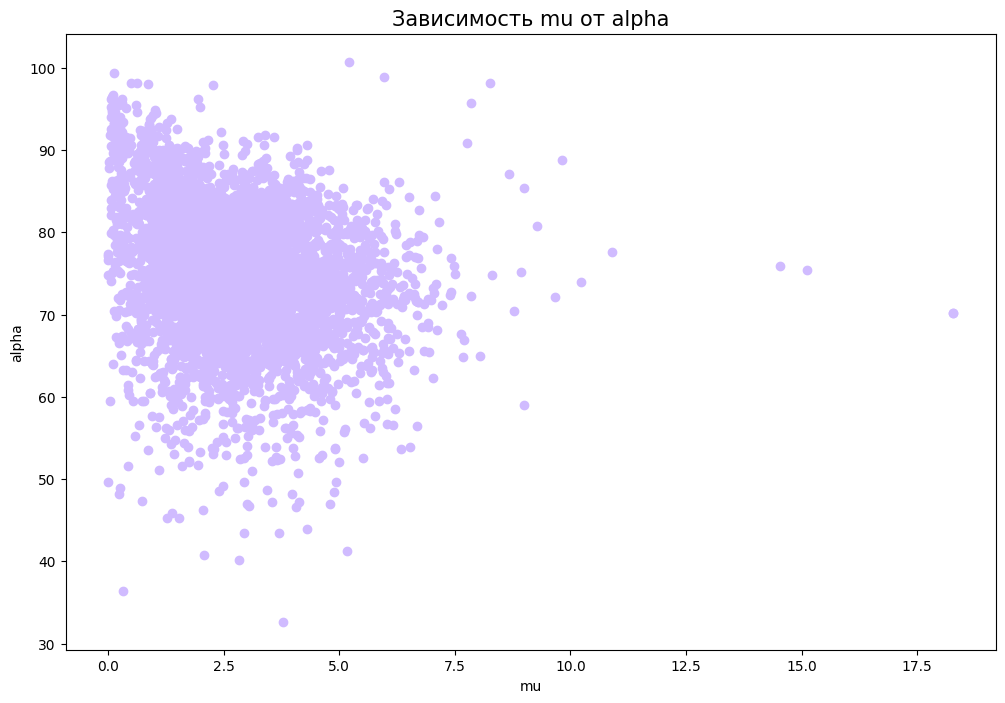

In [28]:
fig, ax = plt.subplots(figsize = (12,8)) # Инициализация графиков и его размеров
# Построим точечный график зависимости mu от alpha
ax.scatter(df5['mu'], df5['alpha'], color = colors[4])
ax.set_title('Зависимость mu от alpha', fontsize = 15) # Создание заголовка
plt.xlabel('mu')
plt.ylabel('alpha')
plt.show() #Вывод графика

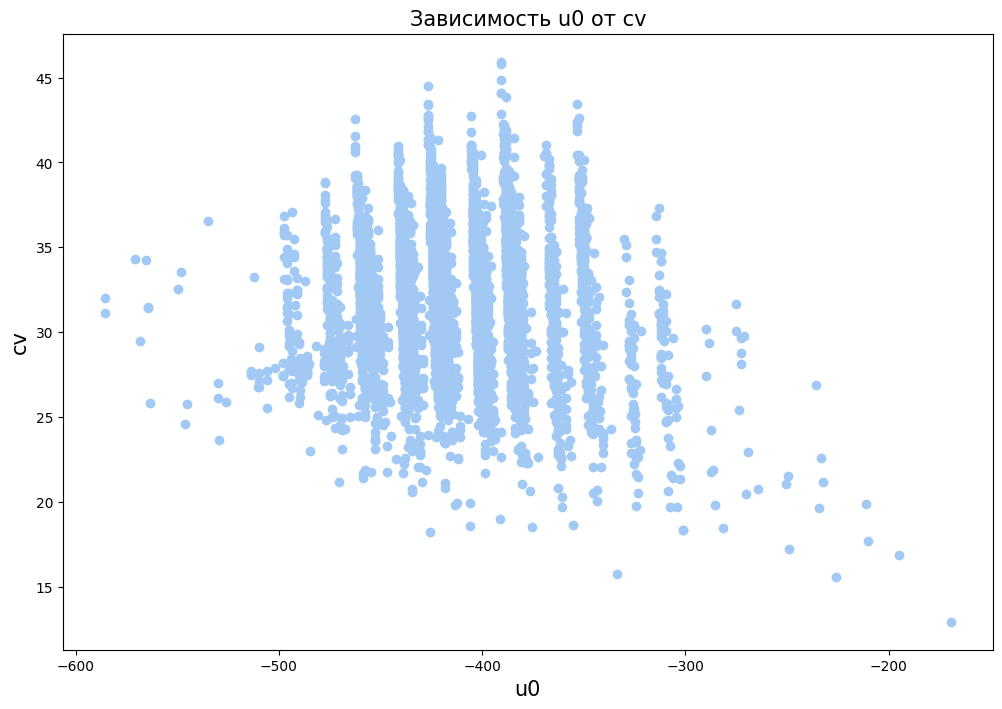

In [29]:
fig, ax = plt.subplots(figsize = (12,8)) # Инициализация графиков и его размеров
# Построим точечный график зависимости u0 от cv
ax.scatter(df5['u0'], df5['cv'], color = colors[0])
# Команда fontsize позволяет менять размер текста
ax.set_title('Зависимость u0 от cv', fontsize = 15) # Создание заголовка
ax.set_xlabel('u0', fontsize = 15) # Создание подписи оси х
ax.set_ylabel('cv', fontsize = 15) # Создание подписи оси y
plt.show() #Вывод графика

<Axes: xlabel='SPS', ylabel='Count'>

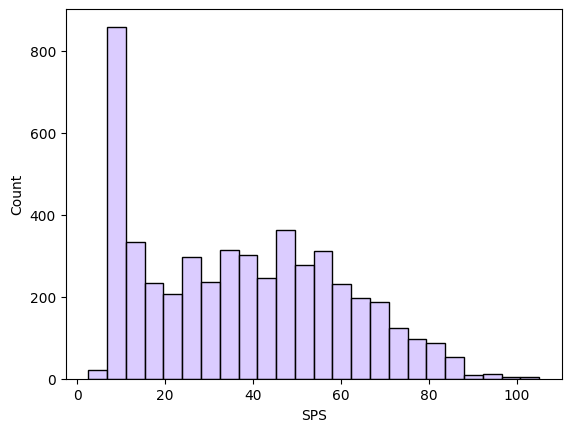

In [30]:
# Построим гистограмму по SPS
sns.histplot(df5['SPS'], color = colors[4], bins = 24)

<Axes: ylabel='cv'>

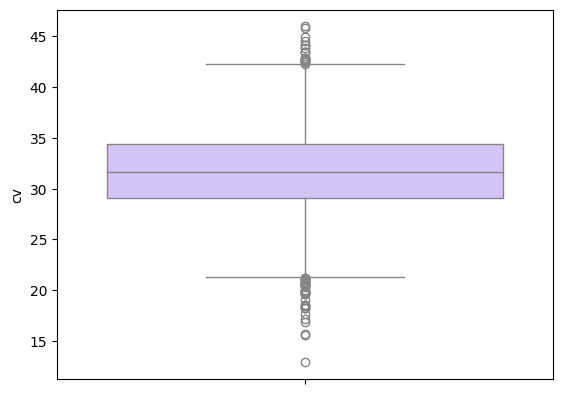

In [31]:
sns.boxplot(y='cv', data=df4, color=colors[4])

<Axes: ylabel='BertzCT'>

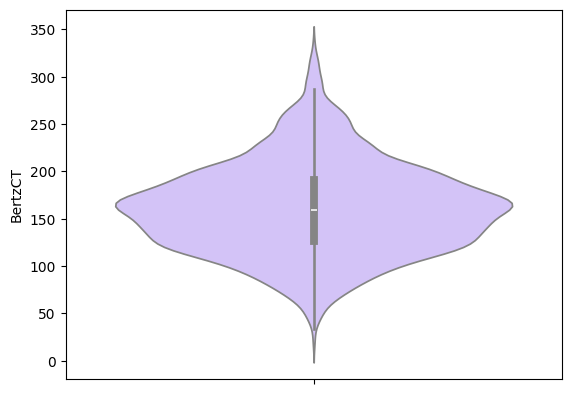

In [32]:
sns.violinplot(y='BertzCT', data=df5, color=colors[4])

<Axes: >

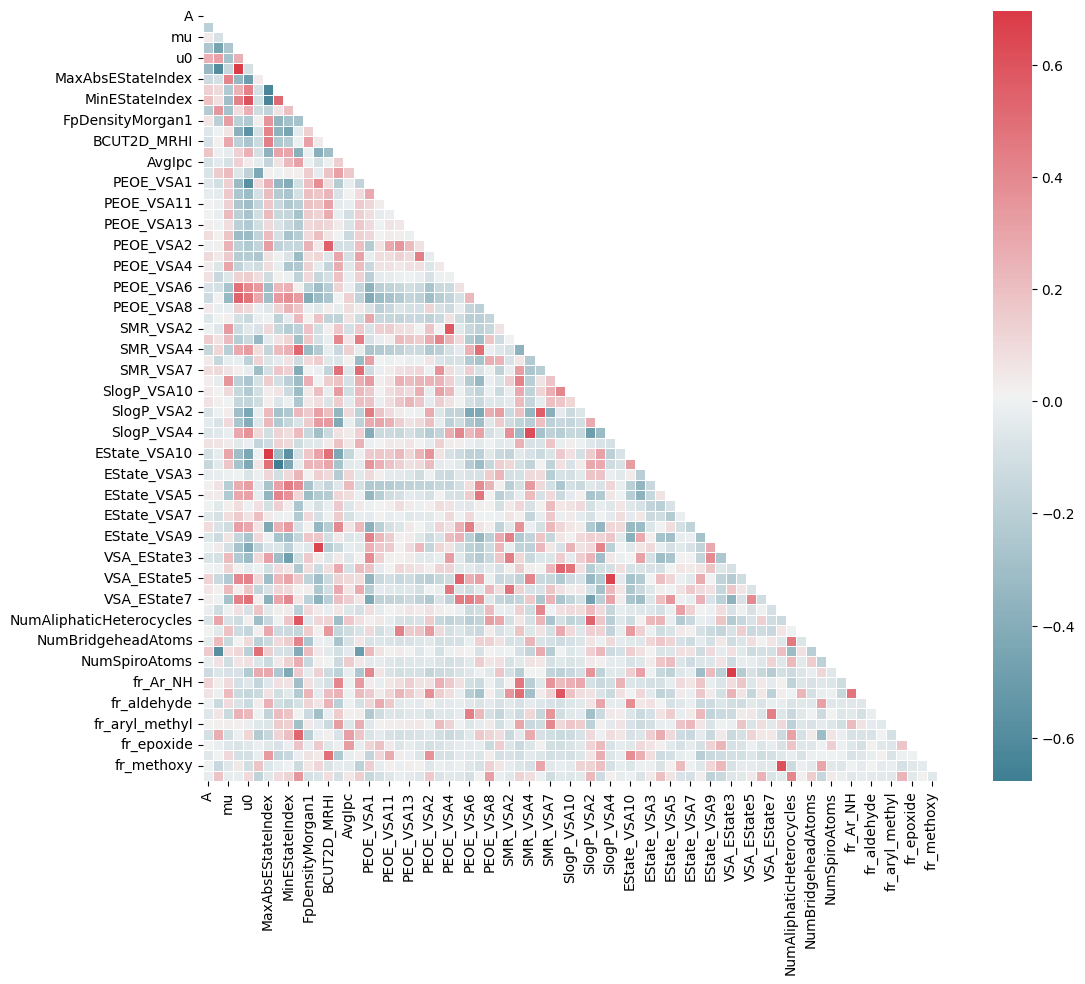

In [33]:
# Расчет корреляции
corr = df5.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10)) #создание графика и определение его размеров
cmap = sns.diverging_palette(220, 10, as_cmap=True) #создание палитры для корреляционного графика
sns.heatmap(corr, cmap=cmap, linewidths=.5, mask=mask, annot=False, fmt=".1f")
#annot=True - вывод коэффициентов корреляции, fmt - число знаков после запятой, v - пределы, cmap - палитра, linewidth - толщина шрифта

In [58]:
import sqlite3

csv_file_path = 'data5.csv'
data = pd.read_csv('data5.csv')
# подключение к базе данных SQLite
database = 'molecules.db'
conn = sqlite3.connect(database)

# Сохраняем DataFrame в таблицу базы данных
data.to_sql('information', conn, if_exists='replace', index=False)

conn.close()

print("Данные успешно внесены в базу данных!")

Данные успешно внесены в базу данных!


In [69]:
# Повторное подключение для чтения данных
conn = sqlite3.connect(database)

# Курсор для выполнения SQL-запросов
cursor = conn.cursor()

# Выполнение запроса для получения данных из таблицы
table_name = 'information'
cursor.execute(f"SELECT * FROM {'information'}")
rows = cursor.fetchall()
# Преобразование данных в DataFrame
columns = [description[0] for description in cursor.description]
data = pd.DataFrame(rows, columns=columns)

print(data)

# Закрытие курсора и подключения
cursor.close()
conn.close()

            A        B      mu  alpha          u0      cv  MaxAbsEStateIndex  \
0     5.99438  2.27301  4.5933  55.81 -323.338627  21.459           8.311944   
1     2.32923  0.75737  3.4068  77.34 -458.914682  35.183           9.588026   
2     2.71950  1.23126  1.2920  76.75 -438.996978  32.710           8.328809   
3     2.29944  0.85305  3.1488  79.50 -422.988608  36.895           9.846767   
4     3.03493  1.26316  1.9135  77.81 -435.272093  32.448           7.125972   
...       ...      ...     ...    ...         ...     ...                ...   
4995  2.81953  0.95253  5.6157  77.77 -401.969669  33.153          10.285547   
4996  4.22393  1.23139  1.2093  78.14 -403.082393  30.043           5.502454   
4997  2.40023  1.44261  2.0425  81.95 -404.332161  36.045           9.186319   
4998  8.05652  1.25277  4.1565  58.08 -414.713710  23.621           9.590000   
4999  2.78740  1.36171  3.8381  72.58 -460.193250  32.110          10.678102   

      MinAbsEStateIndex  MinEStateIndex

In [71]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [85]:
from dash import Dash, dcc, html
import plotly.express as px

# Загрузка данных из базы данных
database = 'molecules.db'
conn = sqlite3.connect(database)

# Курсор для выполнения SQL-запросов
cursor = conn.cursor()

# Получение данных из таблицы
table_name = 'molecules'
cursor.execute(f'SELECT * FROM {"information"}')
rows = cursor.fetchall()

# Преобразование данных в DataFrame
columns = [description[0] for description in cursor.description]
data = pd.DataFrame(rows, columns=columns)

# Закрытие курсора и подключения
cursor.close()
conn.close()

# Создание веб-приложения Dash
app = Dash(__name__)

# Обновление layout
app.layout = html.Div(children=[
    html.H1(children='Data Visualization'),

    dcc.Graph(
        id='graph',
        figure=px.scatter(data, x='A', y='B', title='Visualization of Data from SQLite')
    )
])

# Запуск приложения
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>